In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy




### Observations


The cities with between the latitude ranges of -20 to 20 are 80 degrees and among the hottest cities. Whereas temperatures for cities in the northern hemisphere, above 20 latitude, are at least 20 degrees cooler. The temperature decreases if the city is further north.

There does not appear to be a direct correlation with humidity nor cloudiness and the distance from the equator. Humidity for the northern hemisphere is more equally scattered in the winter, particular for cities between 40-60 latitude with humidity levels between 80%-100%.

Most of the windspeed typically ranges between 0-10 mph for at least 50% of the cities. A quarter of the cities experience windspeed >0-20 mph. Less than a quarter of the cities experience windspeeds greater than 20 mph.


### Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
# Range of latitudes and longitudes
# lat_range = (-90, 90)
# lng_range = (-180, 180)
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

In [3]:
#Creating a new data frame from the lists above
cities_df = pd.DataFrame({"City": cities})
cities_df.head()


,City
0,verkhnevilyuysk
1,havelock
2,busselton
3,chokurdakh
4,pangnirtung


In [4]:
# Add columns for additional data
# Hint: Be sure to specify "" as the initial value for each column.

cities_df["Date"] = ""
cities_df["Lat"] = ""
cities_df["Lng"] = ""
cities_df["Temperature (F)"] = ""
cities_df["Humidity"] = ""
cities_df["Cloudiness"] = ""
cities_df["Wind Speed (mph)"] = ""

cities_df.head()

,City,Date,Lat,Lng,Temperature (F),Humidity,Cloudiness,Wind Speed (mph)
0,verkhnevilyuysk,,,,,,,
1,havelock,,,,,,,
2,busselton,,,,,,,
3,chokurdakh,,,,,,,
4,pangnirtung,,,,,,,


## Perform API Calls

In [5]:
# OpenWeatherMap API Key
api_key = api_key

record_counter = 0
set_counter = 0

# Starting URL for Weather Map API Call

print('Beginning Data Retrieval')
print('------------------------')



# Loop through the cities_df

for index, row in cities_df.iterrows():
    base_url =  "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key#extract out from dataframe current city rows
    
    city = row["City"]

    #make request and convert to json
    city_weather = requests.get(base_url + "&q=" + city)
    
    #convert to json
    city_weather = city_weather.json()
    
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0
    
    #extract Lat, Lng, Temperature (F), Humidity, Cloudiness, Wind Speed (mph)
    #pack into current rows and columns; 
    #inside of of iterrows loop; have access to index and row; using .loc method for index as row specification and as column specification
    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))
    print(base_url)
    
    try:
        cities_df.loc[index, "Lat"] = city_weather["coord"]["lat"]
        cities_df.loc[index, "Lng"] = city_weather["coord"]["lon"]
        cities_df.loc[index, "Date"] = city_weather["dt"]
        cities_df.loc[index, "Temperature (F)"] = city_weather["main"]["temp"]
        cities_df.loc[index, "Humidity"] = city_weather["main"]["humidity"]
        cities_df.loc[index, "Cloudiness"] = city_weather["clouds"]["all"]
        cities_df.loc[index, "Wind Speed (mph)"] = city_weather["wind"]["speed"]

    except (KeyError, IndexError):
        print("Error detected, next record")
        
print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')


Beginning Data Retrieval
------------------------
Processing record 1 of set 0 | verkhnevilyuysk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 2 of set 0 | havelock
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 3 of set 0 | busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 4 of set 0 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 5 of set 0 | pangnirtung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 6 of set 0 | la rioja
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 7 of set 0 | attawapiskat
http://api.openweathermap.org/data/2.5/weather?

Processing record 8 of set 1 | paamiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 9 of set 1 | bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 10 of set 1 | lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 11 of set 1 | ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 12 of set 1 | nanortalik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 13 of set 1 | yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 14 of set 1 | labuhan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing 

Processing record 14 of set 2 | riachao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 15 of set 2 | beyneu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 16 of set 2 | rundu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 17 of set 2 | usinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 18 of set 2 | moose factory
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 19 of set 2 | kanniyakumari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 20 of set 2 | ngukurr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Error

Processing record 20 of set 3 | shache
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 21 of set 3 | cejkovice
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 22 of set 3 | sorland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 23 of set 3 | mahebourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 24 of set 3 | poopo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 25 of set 3 | barawe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Error detected, next record
Processing record 26 of set 3 | sioux lookout
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e

Processing record 25 of set 4 | kutum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 26 of set 4 | thompson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 27 of set 4 | hami
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 28 of set 4 | wulanhaote
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Error detected, next record
Processing record 29 of set 4 | nandigama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 30 of set 4 | mergui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Error detected, next record
Processing record 31 of set 4 | waidhofen
http://api.openweathermap.org/data/2.5/weather?units=Imp

Processing record 31 of set 5 | lata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 32 of set 5 | marawi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 33 of set 5 | khatanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 34 of set 5 | flinders
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 35 of set 5 | pizarro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 36 of set 5 | bintulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 37 of set 5 | ulladulla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing re

Processing record 39 of set 6 | vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 40 of set 6 | neepawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 41 of set 6 | ust-uda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 42 of set 6 | geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 43 of set 6 | rungata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Error detected, next record
Processing record 44 of set 6 | baykit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 45 of set 6 | bonthe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196

Processing record 45 of set 7 | stefan cel mare
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 46 of set 7 | quang ngai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 47 of set 7 | ninove
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 48 of set 7 | kamenka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 49 of set 7 | waitati
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 50 of set 7 | sirhind
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 0 of set 8 | skalistyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Er

Processing record 0 of set 9 | kimparana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 1 of set 9 | vicuna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Error detected, next record
Processing record 2 of set 9 | komsomolskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 3 of set 9 | dunedin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 4 of set 9 | guaraniacu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 5 of set 9 | beringovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 6 of set 9 | severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc

Processing record 7 of set 10 | westport
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 8 of set 10 | coos bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 9 of set 10 | houma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 10 of set 10 | carupano
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 11 of set 10 | haradok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 12 of set 10 | ypsonas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 13 of set 10 | amealco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processi

Processing record 12 of set 11 | mathbaria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 13 of set 11 | cheuskiny
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Error detected, next record
Processing record 14 of set 11 | ketchikan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 15 of set 11 | wilmington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 16 of set 11 | pemba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Processing record 17 of set 11 | dianopolis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb
Error detected, next record
Processing record 18 of set 11 | auriflama
http://api.openweathermap.org/data/2.5/

In [6]:
#Visualize to confirm dataframe populated
cities_df.head()

,City,Date,Lat,Lng,Temperature (F),Humidity,Cloudiness,Wind Speed (mph)
0,verkhnevilyuysk,1546908584,63.45,120.31,-13.08,60,56,2.73
1,havelock,1546905480,34.88,-76.9,48.47,86,40,8.05
2,busselton,1546908584,-33.64,115.35,62.97,100,12,19.84
3,chokurdakh,1546908585,70.62,147.9,-31.26,53,32,2.95
4,pangnirtung,1546908585,66.15,-65.72,-25.23,38,8,6.76


In [7]:
#Convert unix time stamp to regular date
# date =datetime.datetime.fromtimestamp(int(cities_df.head['Date'][0])).strftime('%m/%d/%Y')
# cities_df.head()

In [8]:
#convert objects to numeric
cities_df["Lat"] = pd.to_numeric(cities_df["Lat"])
cities_df["Lng"] = pd.to_numeric(cities_df["Lng"])
cities_df["Temperature (F)"] = pd.to_numeric(cities_df["Temperature (F)"])
cities_df["Humidity"] = pd.to_numeric(cities_df["Humidity"])
cities_df["Cloudiness"] = pd.to_numeric(cities_df["Cloudiness"])
cities_df["Wind Speed (mph)"] = pd.to_numeric(cities_df["Wind Speed (mph)"])

cities_df.dtypes

City                 object
Date                 object
Lat                 float64
Lng                 float64
Temperature (F)     float64
Humidity            float64
Cloudiness          float64
Wind Speed (mph)    float64
dtype: object

In [9]:
# Save Data to csv
cities_df.to_csv("output_data_cities.csv")


In [10]:
cities_df.columns

Index(['City', 'Date', 'Lat', 'Lng', 'Temperature (F)', 'Humidity',
       'Cloudiness', 'Wind Speed (mph)'],
      dtype='object')

### Temperature (F) vs. Latitude Plot

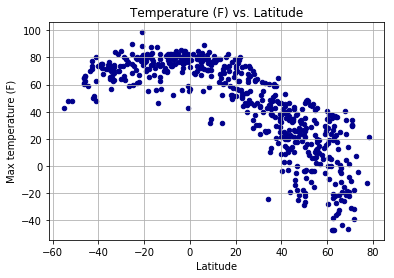

In [11]:
cities_df.plot(kind='scatter', x='Lat', y='Temperature (F)', c='DarkBlue')
plt.title('Temperature (F) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.grid()



In [19]:
plt.savefig("LatitudeVsTemperature.png")
plt.show()

<Figure size 432x288 with 0 Axes>

### Humidity (%) vs. Latitude Plot

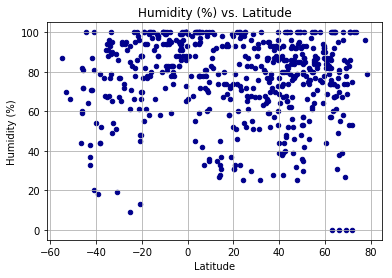

In [13]:
# Humidity (%) vs. Latitude

cities_df.plot(kind='scatter',x='Lat',y='Humidity', c='DarkBlue')
plt.title('Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()


In [20]:
plt.savefig("LatitudeVsHumidity.png")
plt.show()

<Figure size 432x288 with 0 Axes>

### Cloudiness (%) vs. Latitude Plot

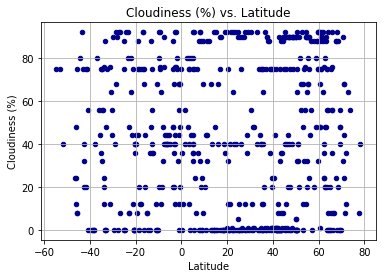

In [15]:
cities_df.plot(kind='scatter',x='Lat',y='Cloudiness', c='DarkBlue')
plt.title("Cloudiness (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()


In [21]:
plt.savefig("CloudinessVSLatitude.png")
plt.show()

<Figure size 432x288 with 0 Axes>

### Wind Speed (mph) vs. Latitude Plot

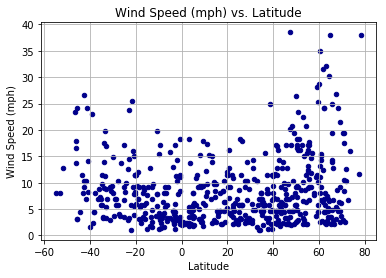

In [17]:
cities_df.plot(kind='scatter',x='Lat',y='Wind Speed (mph)', c='DarkBlue')
plt.title("Wind Speed (mph) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()


In [24]:
plt.savefig("WindspeedVSLatitude.png")
plt.show()

<Figure size 432x288 with 0 Axes>